In [1]:
import os
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from datetime import datetime as dt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
#define the file path
superstore = Path('superstore2.csv')

In [3]:
#to read csv file
# Or use 'latin1' => file contains characters that cannot be decoded using the default utf-8 encoding
superstore_df = pd.read_csv(superstore, encoding='ISO-8859-1')  
superstore_df.head()

,ï»¿Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#count the row
superstore_df.count()

ï»¿Row_ID        9994
Order_ID         9994
Order_Date       9994
Ship_Date        9994
Ship_Mode        9994
Customer_ID      9994
Customer_Name    9994
Segment          9994
Country          9994
City             9994
State            9994
Postal_Code      9994
Region           9994
Product_ID       9994
Category         9994
Sub_Category     9994
Product_Name     9994
Sales            9994
Quantity         9994
Discount         9994
Profit           9994
dtype: int64

In [5]:
#retrieve the data info
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Row_ID      9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
#to see all the columns
print(superstore_df.columns)

Index(['ï»¿Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [7]:
superstore_df.describe()

,ï»¿Row_ID,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#to convert the order date and ship date columns to datetime


#convert to datetime
superstore_df['Order_Date'] = pd.to_datetime(superstore_df['Order_Date'])
superstore_df['Ship_Date'] = pd.to_datetime(superstore_df['Ship_Date'])

superstore_df.head()

,ï»¿Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
#make sure the code work and data type change
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ï»¿Row_ID      9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub_Category   9994 n

In [10]:
##compare year over year performance by sales and profit 

In [11]:
# Convert the 'Order Date' column to datetime
superstore_df['Order_Date'] = pd.to_datetime(superstore_df['Order_Date'], format='%m/%d/%Y')

In [12]:
# Extract the year from the 'Order Date'
superstore_df['Year'] = superstore_df['Order_Date'].dt.year

In [13]:
# Group the data by year and calculate total sales
yearly_sales = superstore_df.groupby('Year')['Sales'].sum().reset_index()
yearly_sales

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [14]:
#Group the data by year and compute total sales and total profit
yearly_metrics = superstore_df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()
yearly_metrics

,Year,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_8415/2038546506.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


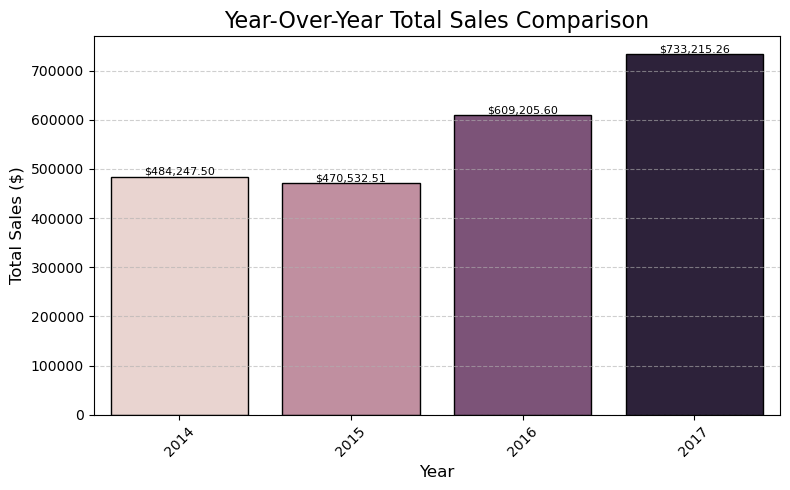

In [15]:


# Assuming `yearly_sales` is a DataFrame with 'Year' and 'Sales' columns
plt.figure(figsize=(8, 5))

# Create a bar chart using Seaborn
ax = sns.barplot(
    x='Year',
    y='Sales',
    data=yearly_sales,  # Corrected reference to `yearly_sales`
    palette=sns.cubehelix_palette(as_cmap=False, n_colors=len(yearly_sales)),  # Set as_cmap to False for palette
    edgecolor='black'
)

# Add labels on top of each bar
for p in ax.patches:  # Use `ax.patches` to access bars in Seaborn
    height = p.get_height()
    ax.annotate(
        f'${height:,.2f}',  # Format as currency with two decimal places
        (p.get_x() + p.get_width() / 2, height),  # Position at top of the bar
        ha='center',
        va='bottom',
        fontsize=8
    )

# Customize the chart
plt.title('Year-Over-Year Total Sales Comparison', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

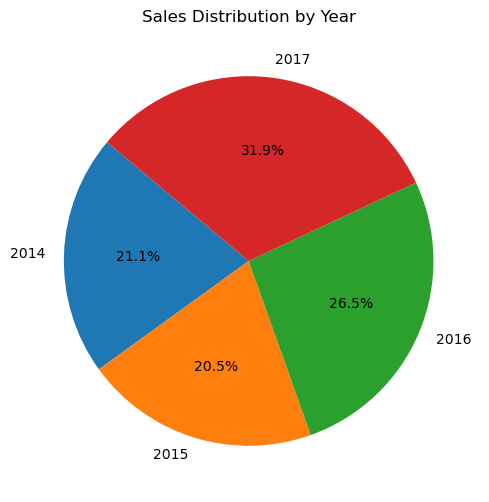

In [16]:
#to see the percentage in the pie charts for year over year total sales comparison

plt.figure(figsize=(8, 6))
plt.pie(
    yearly_sales['Sales'], 
    labels=yearly_sales['Year'], 
    autopct='%1.1f%%', 
    startangle=140)

plt.title("Sales Distribution by Year")
plt.show()


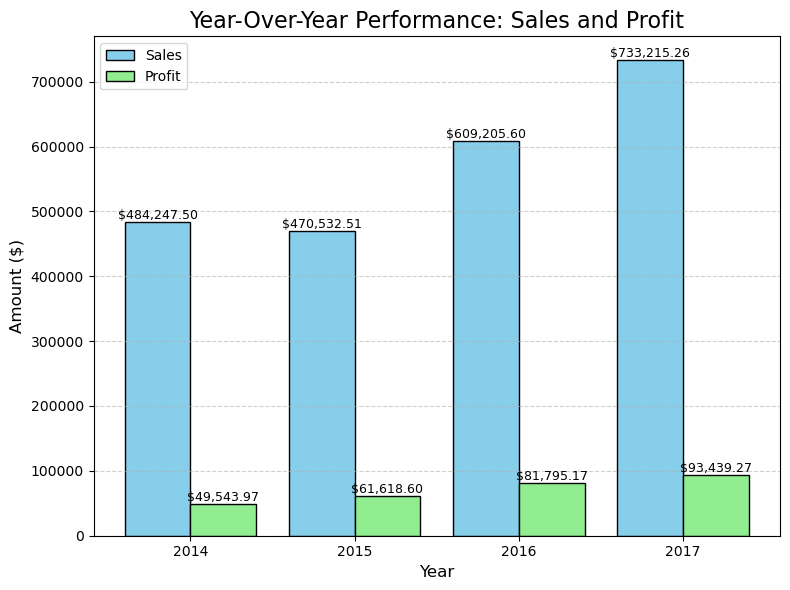

In [17]:
# Step 3: Visualize the Year-Over-Year Performance Using Matplotlib
plt.figure(figsize=(8, 6))

# Bar chart for Sales
bars1 = plt.bar(yearly_metrics['Year'] - 0.2, yearly_metrics['Sales'], width=0.4, label='Sales', color='skyblue', edgecolor='black')

# Bar chart for Profit
bars2 = plt.bar(yearly_metrics['Year'] + 0.2, yearly_metrics['Profit'], width=0.4, label='Profit', color='lightgreen', edgecolor='black')

# Add labels on top of the bars
for bar in bars1:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'${bar.get_height():,.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )
for bar in bars2:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'${bar.get_height():,.2f}',
        ha='center',
        va='bottom',
        fontsize=9
    )

# Customize the chart
plt.title('Year-Over-Year Performance: Sales and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(yearly_metrics['Year'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

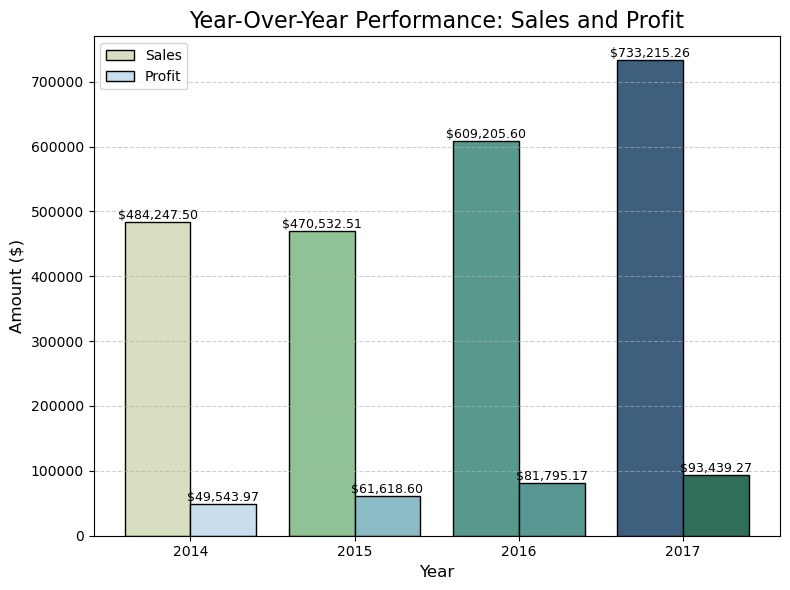

In [18]:


# Assuming `yearly_metrics` is a DataFrame with 'Year', 'Sales', and 'Profit' columns
plt.figure(figsize=(8, 6))

# Define the bar width
bar_width = 0.4

# Define positions for the bars
x_positions = np.arange(len(yearly_metrics['Year']))

# Generate cubehelix palettes
sales_palette = sns.cubehelix_palette(start=0.5, rot=-0.75, n_colors=len(yearly_metrics), light=0.85, dark=0.35)
profit_palette = sns.cubehelix_palette(start=2, rot=0.25, n_colors=len(yearly_metrics), light=0.85, dark=0.35)

# Bar chart for Sales
bars1 = plt.bar(
    x_positions - bar_width / 2,
    yearly_metrics['Sales'],
    width=bar_width,
    label='Sales',
    color=sales_palette,  # Apply the cubehelix palette for Sales
    edgecolor='black'
)

# Bar chart for Profit
bars2 = plt.bar(
    x_positions + bar_width / 2,
    yearly_metrics['Profit'],
    width=bar_width,
    label='Profit',
    color=profit_palette,  # Apply the cubehelix palette for Profit
    edgecolor='black'
)

# Add labels on top of the bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:  # Only add labels for positive bars
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${height:,.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

for bar in bars2:
    height = bar.get_height()
    if height > 0:  # Only add labels for positive bars
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${height:,.2f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Customize the chart
plt.title('Year-Over-Year Performance: Sales and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.xticks(x_positions, yearly_metrics['Year'])  # Use the center positions for xticks
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

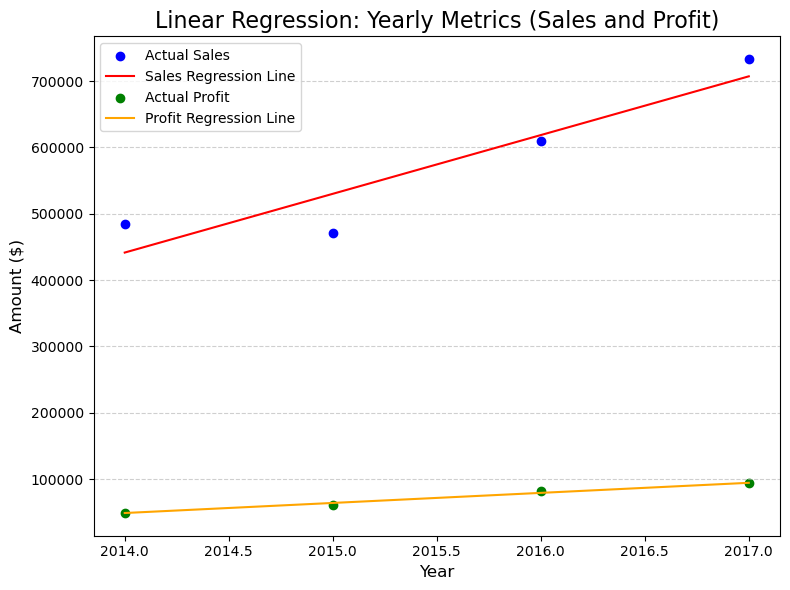

Sales Linear Regression: Slope = 88557.63603000001, Intercept = -177913615.20339003
Profit Linear Regression: Slope = 15186.245709999997, Intercept = -30536278.973079994


In [19]:
# Group the data by year and compute total sales and total profit
yearly_metrics_linear = yearly_metrics.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

# Prepare data for linear regression for Sales and Profit
X = yearly_metrics_linear['Year'].values.reshape(-1, 1)  # Independent variable (Year)

# Linear regression for Sales
y_sales = yearly_metrics_linear['Sales'].values  # Dependent variable (Total Sales)
sales_model = LinearRegression()
sales_model.fit(X, y_sales)
sales_pred = sales_model.predict(X)

# Linear regression for Profit
y_profit = yearly_metrics_linear['Profit'].values  # Dependent variable (Total Profit)
profit_model = LinearRegression()
profit_model.fit(X, y_profit)
profit_pred = profit_model.predict(X)

# Plot the original data and regression lines for Sales and Profit
plt.figure(figsize=(8, 6))

# Scatter plot and regression line for Sales
plt.scatter(X, y_sales, color='blue', label='Actual Sales')
plt.plot(X, sales_pred, color='red', label='Sales Regression Line')

# Scatter plot and regression line for Profit
plt.scatter(X, y_profit, color='green', label='Actual Profit')
plt.plot(X, profit_pred, color='orange', label='Profit Regression Line')

# Customize the chart
plt.title('Linear Regression: Yearly Metrics (Sales and Profit)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Display the regression coefficients for Sales and Profit
sales_slope, sales_intercept = sales_model.coef_[0], sales_model.intercept_
profit_slope, profit_intercept = profit_model.coef_[0], profit_model.intercept_

print(f"Sales Linear Regression: Slope = {sales_slope}, Intercept = {sales_intercept}")
print(f"Profit Linear Regression: Slope = {profit_slope}, Intercept = {profit_intercept}")

In [20]:
##compare year over year performance by quantity

In [21]:
#Group the data by year and compute the total count of orders
yearly_order_count = superstore_df.groupby('Year')['Order_ID'].nunique().reset_index()
yearly_order_count

,Year,Order_ID
0,2014,969
1,2015,1038
2,2016,1315
3,2017,1687


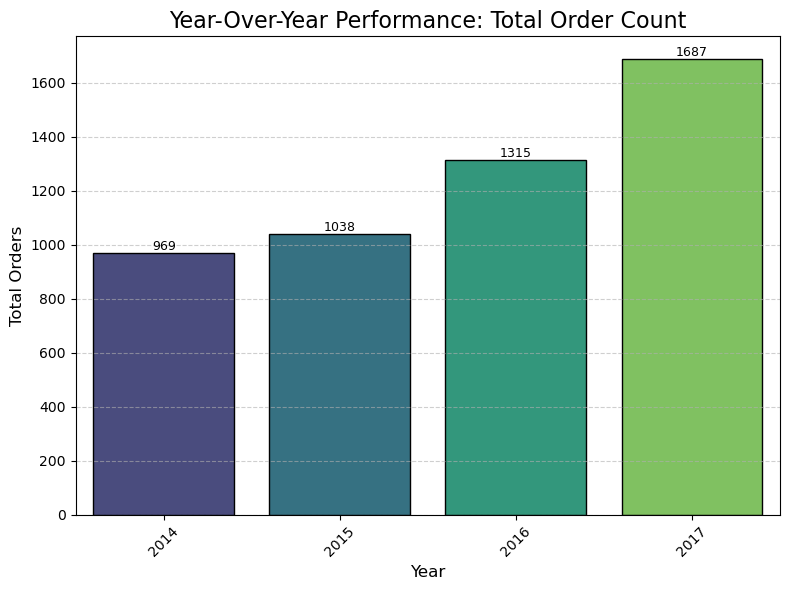

In [22]:


# Assuming 'yearly_order_count' is a DataFrame with 'Year' and 'Order ID' columns
plt.figure(figsize=(8, 6))

# Create a bar chart using Seaborn
ax = sns.barplot(
    x='Year',
    y='Order_ID',
    hue='Year',  # Assign `Year` as `hue`
    data=yearly_order_count,
    palette=sns.color_palette("viridis", n_colors=len(yearly_order_count)),
    edgecolor='black',
    legend=False  # Disable legend since hue is only for the palette
)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Display as integer
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position on top of each bar
        ha='center',
        va='bottom',
        fontsize=9
    )

# Customize the chart
plt.title('Year-Over-Year Performance: Total Order Count', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

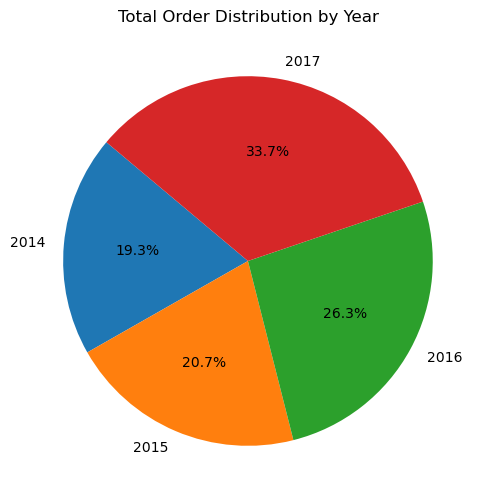

In [23]:
#to see the percentage in the pie charts for year over year total order count

plt.figure(figsize=(8, 6))
plt.pie(
   yearly_order_count['Order_ID'], 
    labels=yearly_order_count['Year'], 
    autopct='%1.1f%%', 
    startangle=140)

plt.title("Total Order Distribution by Year")
plt.show()


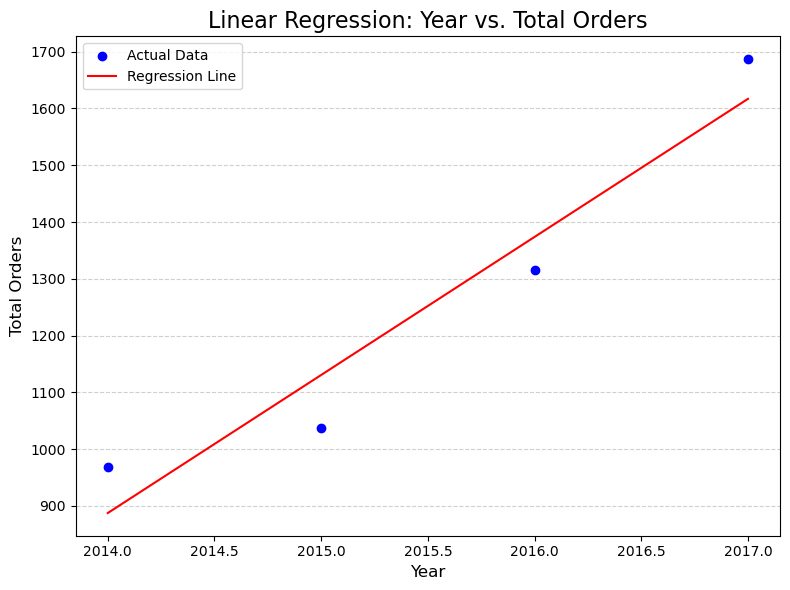

Slope: 243.09999999999994
Intercept: -488715.7999999999


In [24]:



# Prepare data for linear regression
X = yearly_order_count['Year'].values.reshape(-1, 1)  # Independent variable (Year)
y = yearly_order_count['Order_ID'].values          # Dependent variable (Total Orders)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict total orders based on the linear regression model
y_pred = model.predict(X)

# Plot the original data and the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the actual data
plt.scatter(X, y, color='blue', label='Actual Data')

# Regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Customize the chart
plt.title('Linear Regression: Year vs. Total Orders', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

In [25]:
#identify monthly/seasonal trends in sales

In [26]:
# Extract the month from the 'Order Date'
superstore_df['Month'] = superstore_df['Order_Date'].dt.month

In [27]:
# Group the data by month and compute total sales
monthly_sales = superstore_df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales

,Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


In [28]:
monthly_sales['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [29]:
#to specify the name of months
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

monthly_sales['MonthName'] = monthly_sales['Month'].map(month_mapping)
monthly_sales

,Month,Sales,MonthName
0,1,94924.8356,January
1,2,59751.2514,February
2,3,205005.4888,March
3,4,137762.1286,April
4,5,155028.8117,May
5,6,152718.6793,June
6,7,147238.0970,July
7,8,159044.0630,August
8,9,307649.9457,September
9,10,200322.9847,October


/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_8415/1283481507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MonthName', y='Sales', data=monthly_sales, palette=sns.color_palette("crest", n_colors=len(monthly_sales)), edgecolor='black')


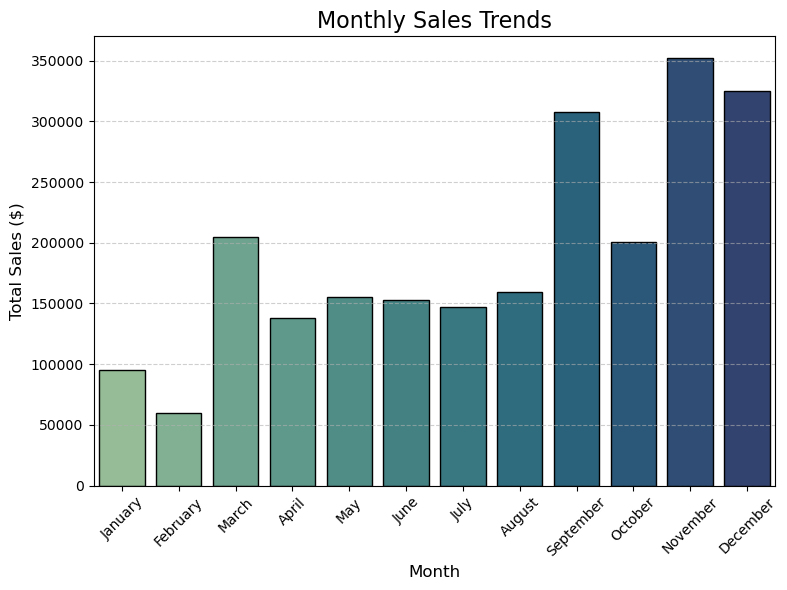

    Month        Sales  MonthName
0       1   94924.8356    January
1       2   59751.2514   February
2       3  205005.4888      March
3       4  137762.1286      April
4       5  155028.8117        May
5       6  152718.6793       June
6       7  147238.0970       July
7       8  159044.0630     August
8       9  307649.9457  September
9      10  200322.9847    October
10     11  352461.0710   November
11     12  325293.5035   December


In [30]:
# Plot the monthly sales
plt.figure(figsize=(8, 6))
#plt.bar(monthly_sales['MonthName'], monthly_sales['Sales'], color='purple', edgecolor='black')
sns.barplot(x='MonthName', y='Sales', data=monthly_sales, palette=sns.color_palette("crest", n_colors=len(monthly_sales)), edgecolor='black')
#sns.color_palette("crest", as_cmap=True)

# Add labels
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
#sns.barplot(x=avg_price_by_sellerg.index, y=avg_price_by_sellerg.values, palette='magma')

# Show the plot
plt.tight_layout()
plt.show()

# Print the monthly sales data
print(monthly_sales)

In [31]:
#analysis here :  